In [11]:
from nnlearn.Compress import *
from nnlearn.Network import sigmoid
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image
from multiprocessing import Process
from threading import Thread
import os
import imageio


 shape: (109, 109) 
pixels: 11881


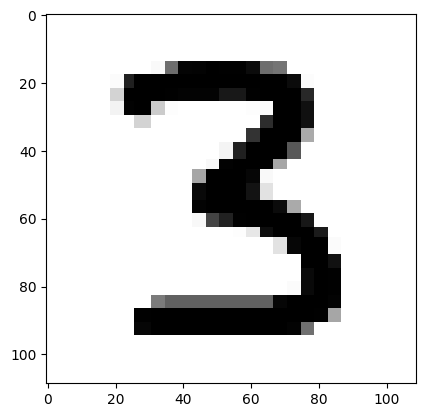

In [12]:
img = image.imread("/Users/morganhawkins/Desktop/first_python_lib/images/digit_3.png")[:,:,0]

scale_down_factor = 4

temp_x = np.arange(452) % scale_down_factor == 0
temp_y = np.arange(451) % scale_down_factor == 0
img = img[temp_x, :]
img = img[:,temp_y]

img = img[2:-2,2:-2]

img = sigmoid((img - np.mean(img))/np.std(img)*3)
# print(img)

print("\n shape:", img.shape, "\npixels:", np.product(img.shape))
plt.imshow(img, cmap = 'Greys')
plt.show()

In [13]:
compresser_sigmoid = nn_image_compresser(hidden_layers = 2, layer_width = 20, activation = sigmoid_activation_layer)

compresser_leaky_relu = nn_image_compresser(hidden_layers = 2, layer_width = 20, activation = leaky_relu_activation_layer)


mixed_net_layers  = (
            [input_layer(size = 2)] +
            
            [connected_layer(num_neurons = 20, prev_neurons = 2),
             leaky_relu_activation_layer(20)] +
            
            [connected_layer(num_neurons = 20, prev_neurons = 20),
             leaky_relu_activation_layer(20)] +
            
            [connected_layer(num_neurons = 1, prev_neurons = 20)] + 

            [sigmoid_activation_layer(1)]

            )
    
compresser_mixed = nn_image_compresser(hidden_layers = 2, layer_width = 20, activation = leaky_relu_activation_layer)
compresser_mixed.network = network(mixed_net_layers)


In [41]:
eps = 10_000

compresser_mixed.fit(img, batch_size = 16, epochs = eps, verbose = False, learn_coef = .05)

compresser_leaky_relu.fit(img, batch_size = 16, epochs = eps, verbose = False, learn_coef = .05)

compresser_sigmoid.fit(img, batch_size = 16, epochs = eps, verbose = False, learn_coef = .05)

In [42]:
# for i in range(170):

#     compresser_leaky_relu.fit(img, batch_size = 16, epochs = i**2, verbose = False, learn_coef = .05)

#     compresser_sigmoid.fit(img, batch_size = 16, epochs = i**2, verbose = False, learn_coef = .05)

#     compresser_mixed.fit(img, batch_size = 16, epochs = i**2, verbose = False, learn_coef = .05)



#     recreated_image_leaky_relu = compresser_leaky_relu.create_image(100,100)
#     recreated_image_sigmoid = compresser_sigmoid.create_image(100,100)
#     recreated_image_mixed= compresser_mixed.create_image(100,100)

#     plt.imsave(f"/Users/morganhawkins/Desktop/first_python_lib/images/mixed_recreations/leaky_relu_{i}.png", recreated_image_leaky_relu)
#     plt.imsave(f"/Users/morganhawkins/Desktop/first_python_lib/images/mixed_recreations/sigmoid_recreations/sigmoid_{i}.png", recreated_image_sigmoid)
#     plt.imsave(f"/Users/morganhawkins/Desktop/first_python_lib/images/mixed_recreations/mixed_{i}.png", recreated_image_mixed)


    





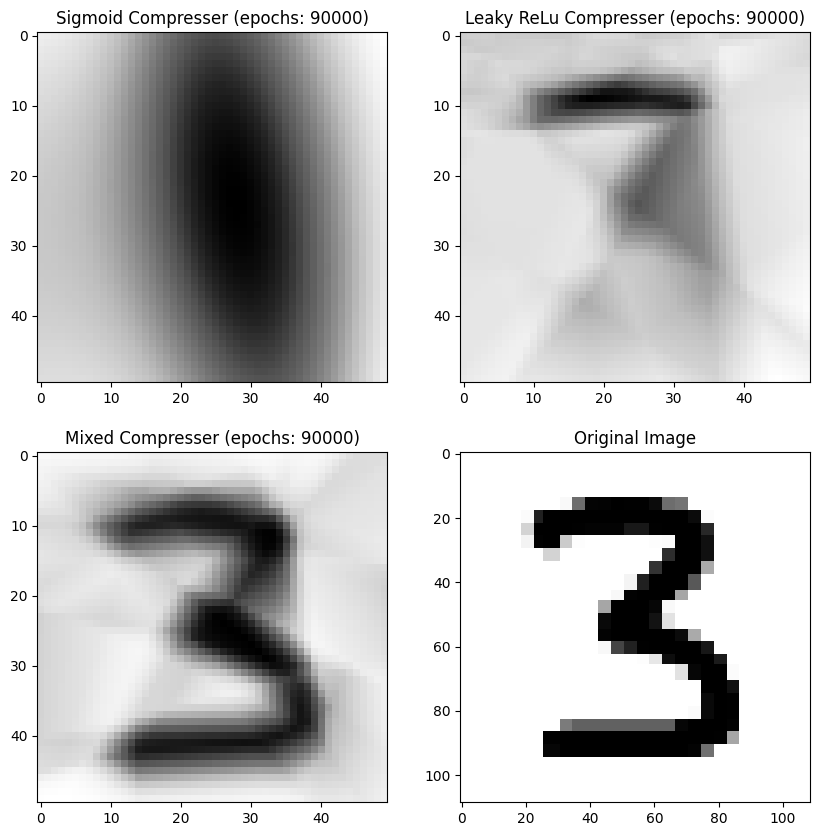

In [43]:
#SIGMOID COMPRESSER RECREATION
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
recreated_image_sigmoid = compresser_sigmoid.create_image(50,50)
plt.imshow(recreated_image_sigmoid, cmap = 'Greys')
plt.title(f"Sigmoid Compresser (epochs: {compresser_sigmoid.network.epochs_trained})")


#LEAKY RELU COMPRESSER RECREATION
plt.subplot(2,2,2)
recreated_image_leaky_relu = compresser_leaky_relu.create_image(50,50)
plt.imshow(recreated_image_leaky_relu, cmap = 'Greys')
plt.title(f"Leaky ReLu Compresser (epochs: {compresser_leaky_relu.network.epochs_trained})")


#DEEP LEAKY RELU COMPRESSER RECREATION
plt.subplot(2,2,3)
recreated_image_leaky_relu_large = compresser_mixed.create_image(50,50)
plt.imshow(recreated_image_leaky_relu_large, cmap = 'Greys')
plt.title(f"Mixed Compresser (epochs: {compresser_mixed.network.epochs_trained})")


#ORIGINAL
plt.subplot(2,2,4)
plt.imshow(img, cmap = 'Greys')
plt.title('Original Image')


plt.show()


In [17]:
# plt.imsave("images/leaky_relu_digit_3.png", recreated_image_leaky_relu)
# plt.imsave("images/sigmoid_digit_3.png", recreated_image_sigmoid)

In [18]:
def gif_from_folder(folder_path, gif_name):

    file_name_list = np.array(sorted(os.listdir(folder_path))[1:])
    nums = list(map(lambda x: x.split("_")[-1], file_name_list))
    nums = list(map(lambda x: int(x.split(".")[0]), nums))

    file_name_list = file_name_list[np.argsort(nums)]
    


    images = []

    for file_name in file_name_list:
        if file_name.endswith('.png'):
            file_path = os.path.join(folder_path, file_name)
            images.append(imageio.imread(file_path))
        

    for _ in range(20):
        images.append(imageio.imread(file_path))


    imageio.mimsave(gif_name, images)

In [ ]:
#gif_from_folder('images/leaky_relu_recreations', 'images/leaky_relu_recreation.gif')
# gif_from_folder('/Users/morganhawkins/Desktop/first_python_lib/images/mixed_recreations', 
#                 '/Users/morganhawkins/Desktop/first_python_lib/images/mixed_recreation.gif')